<a href="https://colab.research.google.com/github/dominiksakic/zero_to_hero/blob/main/build_makemore_noice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- In this Notebook I will

1. Train
2. eval
3. generate
4. measure

- ... a bigram model.

- I will explain the ideas by writing some code out and use a more performant way.

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving names.txt to names.txt
User uploaded file "names.txt" with length 228145 bytes


# Exploring the data

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
min(len(w) for w in words)

2

In [ ]:
max(len(w) for w in words)

15

# Idea 1
- The data consist of words.
- If we use the current letter to predict the next letter we can built out a bigram model.
- How do we built it out?
  - By counting the frequency of each bigram.
  - Use the frequency to predict the next letter.
  - But when to stop? For that we have to introduce a special character at the  end of each word.


In [3]:
# Building out the  idea:
b = {}
for w in words:
  # Create special arr for start and end token
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1 # Count frequency

In [5]:
import torch

In [6]:
# Refining the idea by storing the frequency into a tensor.
N = torch.zeros((28, 28) , dtype=torch.int32)

In [7]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [8]:
for w in words:
  # Create special arr for start and end token
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

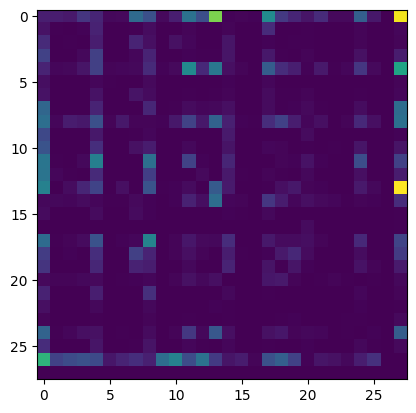

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(N)

- The above image is quite non telling, so lets rework it a bit to make it more readable.